In [18]:
import torch



tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29]])
[5, 5, 5, 5, 5, 5]
{0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5}


tensor([-15.0000, -14.0625, -13.1250, -12.1875, -11.2500, -10.3125,  -9.3750,
         -8.4375,  -7.5000,  -6.5625,  -5.6250,  -4.6875,  -3.7500,  -2.8125,
         -1.8750,  -0.9375,  -0.0000])
5.069297230875236e-07 7.909848136478104e-06
1.294490630243672e-06 1.898492337204516e-05
3.305597147118533e-06 4.53806969744619e-05
8.441137651971076e-06 0.00010797009599627927
2.1555200873990543e-05 0.0002555033133830875
5.504312866833061e-05 0.0006008475320413709
0.000140557560371235 0.001402545371092856
0.00035892630694434047 0.0032450316939502954
0.0009165505180135369 0.0074272132478654385
0.002340493490919471 0.016771838068962097
0.005976659245789051 0.03722526878118515
0.015261936001479626 0.0807500034570694
0.03897271677851677 0.16966542601585388
0.09952032566070557 0.33995556831359863
0.25413402915000916 0.629856288433075
0.6489540338516235 1.0


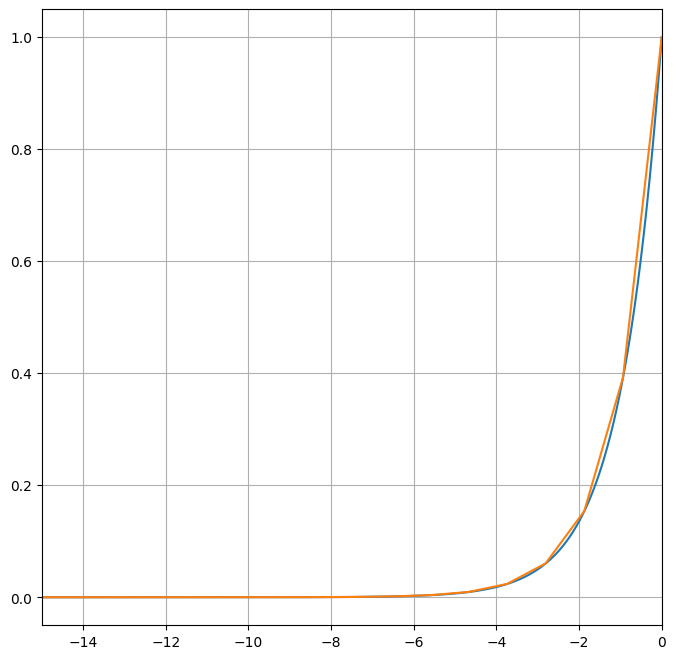

FP32 format inclination
00110101000010000001001111110010
00110101101011011011111001011100
00110110010111011101010110111010
00110111000011011001111001101001
00110111101101001101000101110001
00111000011001101101111000011100
00111001000100110110001010100010
00111001101111000010111001000110
00111010011100000100010010101010
00111011000110010110001011110111
00111011110000111101011111011010
00111100011110100000110100110011
00111101000111111010000111011011
00111101110010111101000101010000
00111110100000100001110111011011
00111111001001100010000111011010
FP32 format bias
00110111000001001011010010001010
00110111100111110100000111010000
00111000001111100101011100100111
00111000111000100110111000000001
00111001100001011111010100010011
00111010000111011000001000110010
00111010101101111101010110011101
00111011010101001010101010011001
00111011111100110101111111111011
00111100100010010110010100011000
00111101000110000111100110000110
00111101101001010110000001000010
00111110001011011011110011000110
00

In [117]:
import torch
import matplotlib.pyplot as plt
import struct 

def exp(x):
    return torch.exp(x)

def lut(x1, x2):
    inclination = (exp(x2) - exp(x1)) / (x2 - x1)
    bias = exp(x1) - inclination * x1
    return inclination, bias

def incl_bias_new_x(level):
    lut_incl = []
    lut_bias = []
    new_x = []
    for i in range(len(level)-1):
        incl, bias = lut(level[i], level[i+1])
        lut_incl.append(incl.item())
        lut_bias.append(bias.item())
        print(incl.item(), bias.item())
        
        ml = level.tolist()
        mask = (ml[i] <= x).float() * (x < ml[i+1]).float()
        new_x.append((incl * x + bias) * mask)

    lx = torch.zeros_like(x)
    for nx in new_x:
        lx = lx + nx
    return lut_incl, lut_bias, lx

# https://www.slingacademy.com/article/python-how-to-convert-a-float-to-binary/
# see https://www.h-schmidt.net/FloatConverter/IEEE754.html to check 
def make_number_to_FP32(x):
    # pack the float as a binary string
    s = struct.pack('!f', x) 

    # convert each byte to binary and join them
    b = ''.join(format(c, '08b') for c in s)
    return b

# minus (uniform)
x = torch.arange(-15.0, 0.0, step=0.001)
step = 16

minus_level = torch.tensor([-15 / step * i for i in range(step + 1)]).flip(0)
print(minus_level)
incl, bias, new_x = incl_bias_new_x(minus_level)

plt.figure(figsize=(8,8))
plt.xlim([-15, 0])
plt.plot(x, exp(x))
plt.plot(x, new_x)
plt.grid(True)
plt.show()

print('FP32 format inclination')
for inc in incl:
    print(make_number_to_FP32(inc))
    
print('FP32 format bias')
for bis in bias:
    print(make_number_to_FP32(bis))

print('FP32 format level')
for lvl in minus_level:
    print(make_number_to_FP32(lvl))

In [121]:
k = 16
a = 2.**k-1

for k in [16, 24, 32]:
    print(2.**k - 1)

255.0
65535.0
4294967295.0
